# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on ='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
number_of_mice = merged_data['Mouse ID'].nunique()
number_of_mice

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.duplicated(subset=['Mouse ID','Timepoint'])

#grab duplicates
duplicate_mice = merged_data[duplicates]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_timepoints = duplicate_mice['Timepoint'].unique()

#printing the dup ID and timepoints for that id
print(duplicate_mouse_ids)
print(duplicate_timepoints)

['g989']
[ 0  5 10 15 20]


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merged_data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)

all_duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

#showing table
all_duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_df['Mouse ID'].nunique()
print(unique_mice_count)

248


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = clean_df.groupby('Drug Regimen')

mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var()
std_dev = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()

#create new dataframe with this new data
summary_df = pd.DataFrame({
    'Mean Tumor Volume':mean,
    'Median Tumor Volume':median,
    'Tumor Volume Variance':variance,
    'Tumor Volume Std. Dev.':std_dev,
    'Tumor Volume Std. Err.':sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

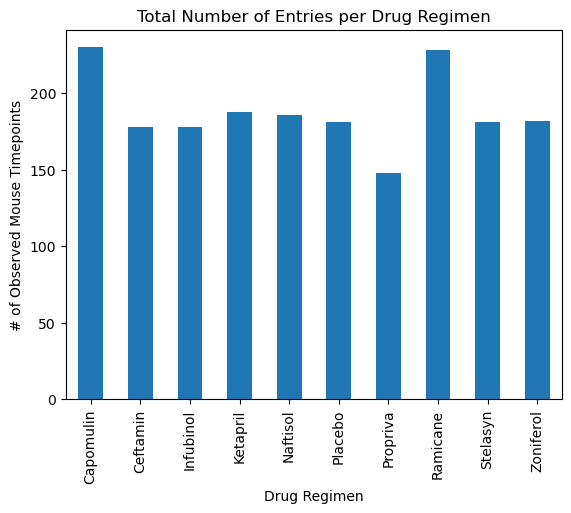

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#group regimen and count how many Mouse Ids are in eache regimen
regimen_count = clean_df.groupby('Drug Regimen').count()['Mouse ID']

#creating plot
regimen_count.plot(kind='bar',title='Total Number of Entries per Drug Regimen')

#creating labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
#putting savefig before showing, otherwise it will not show up in my saved figure

plt.savefig('pandasBar')
plt.show()

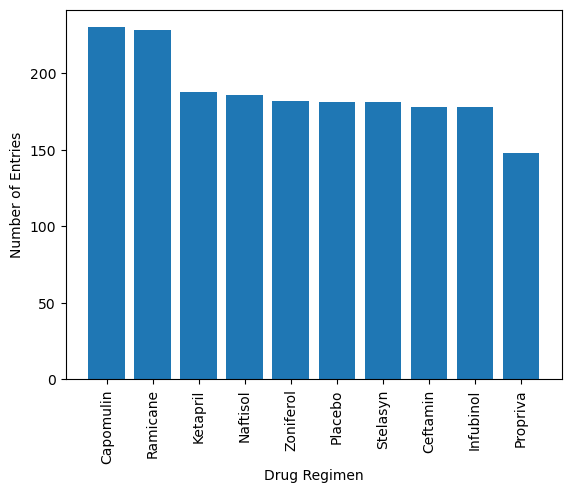

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_pyplot = regimen_count.sort_values(ascending=False)
plt.bar(count_pyplot.index,count_pyplot.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Entries')
plt.xticks(rotation='vertical')
#putting savefig before showing, otherwise it will not show up in my saved figure

plt.savefig('pyplotbar')
plt.show()

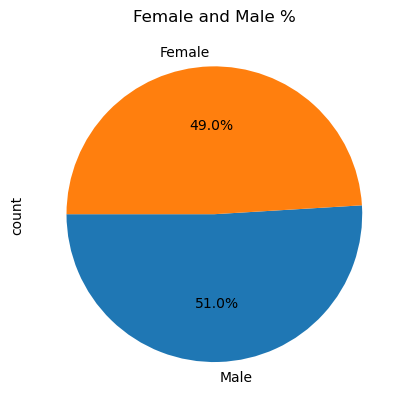

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#store the male and female count
gender_counts = clean_df['Sex'].value_counts()
gender_counts.plot(kind='pie',autopct='%1.1f%%',startangle=180,title='Female and Male %')
#putting savefig before showing, otherwise it will not show up in my saved figure

plt.savefig('pandaspie')
plt.show()

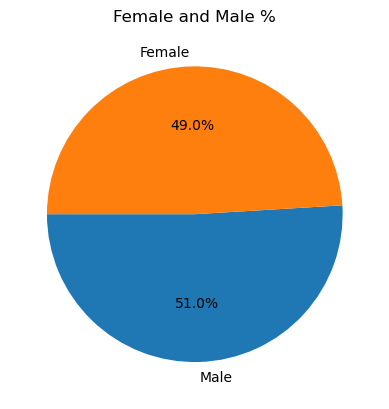

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Female and Male %')
plt.pie(clean_df['Sex'].value_counts(),autopct='%1.1f%%',startangle=180,labels=['Male','Female'])
#putting savefig before showing, otherwise it will not show up in my saved figure
plt.savefig('pyplotpie')
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#storing the 4 drug regimens
treatment_regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']
#filtering data with those 4 regimens
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepoint,filtered_df,on=['Mouse ID','Timepoint'],how='left')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
#I will reuse the list I created in the previous step treatment_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen']==treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol<lower_bound)|(final_tumor_vol > upper_bound)]
    print(f":{treatment}'s potential outliers: {outliers}")

:Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
:Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
:Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
:Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

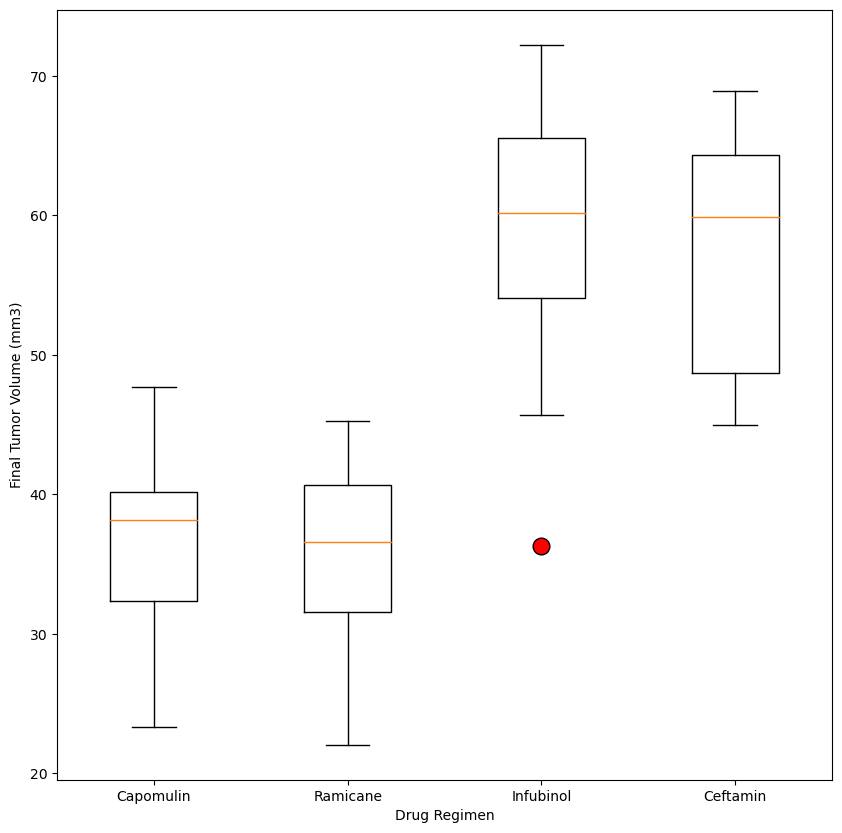

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,10))
plt.boxplot(tumor_vol_data,flierprops=dict(marker='o',markerfacecolor='red',markersize=12), labels=treatment_regimens)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.savefig('boxplot')
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

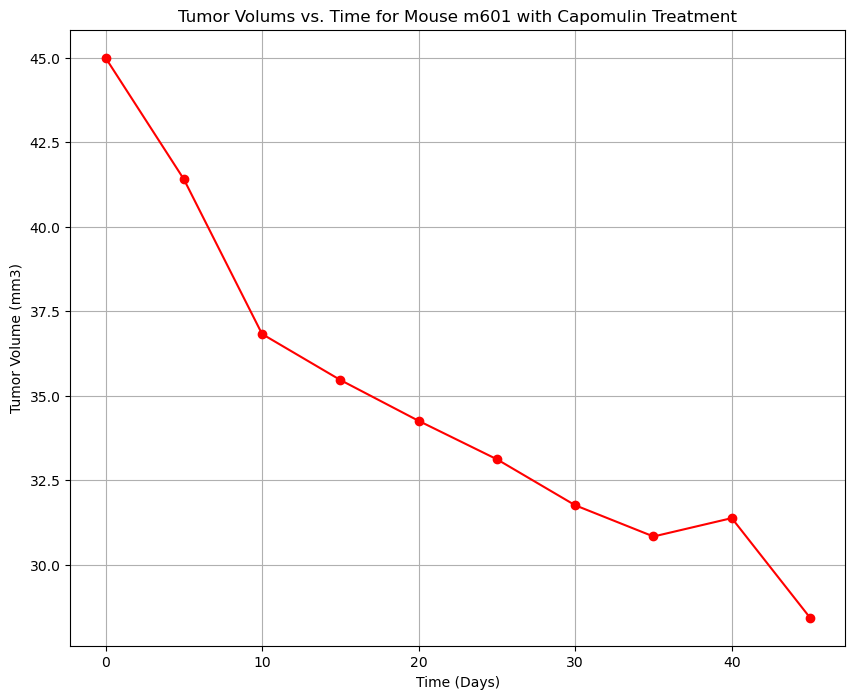

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_df[clean_df['Drug Regimen']=='Capomulin']['Mouse ID'].unique()
target_mouse = capomulin_mice[2]
target_mouse
#'m601'

#collect data for target mouse 2
mouse_data = clean_df[(clean_df['Mouse ID'] == target_mouse) & (clean_df['Drug Regimen']== 'Capomulin')]
#line graph

plt.figure(figsize=(10,8))
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'],marker='o',color='r')
plt.title(f"Tumor Volums vs. Time for Mouse {target_mouse} with Capomulin Treatment")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.grid(True)
plt.savefig('lineplot_volandtime_m601')
plt.show

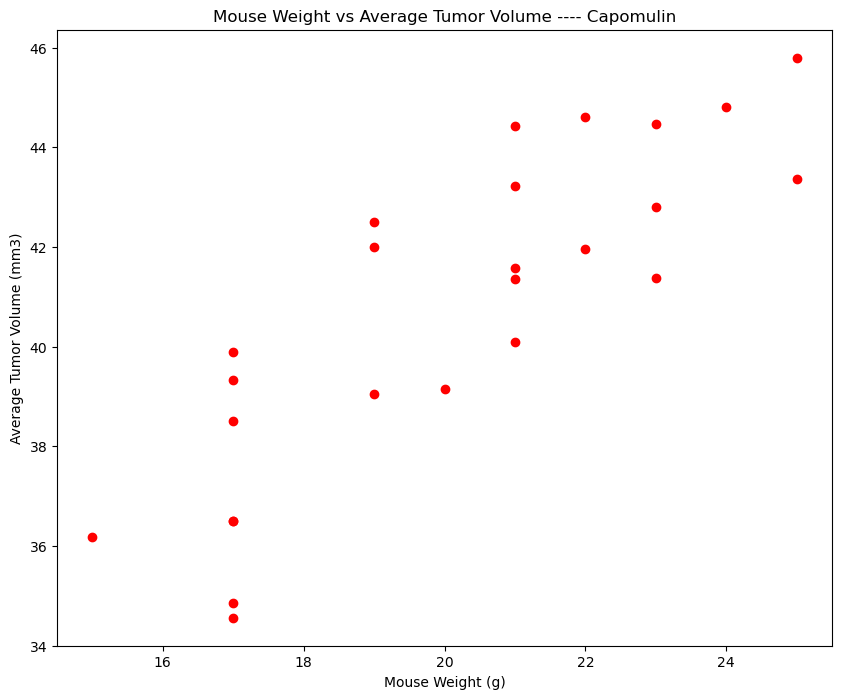

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen']=='Capomulin']

average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# average_tumor_vol

average_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
vol_weight_merged_df = pd.DataFrame({'Average Tumor Volume (mm3)':average_tumor_vol, 'Mouse Weight':average_weight})

plt.figure(figsize=(10,8))
plt.scatter(vol_weight_merged_df['Mouse Weight'],vol_weight_merged_df['Average Tumor Volume (mm3)'], color = 'r')
plt.title('Mouse Weight vs Average Tumor Volume ---- Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatter_plot')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


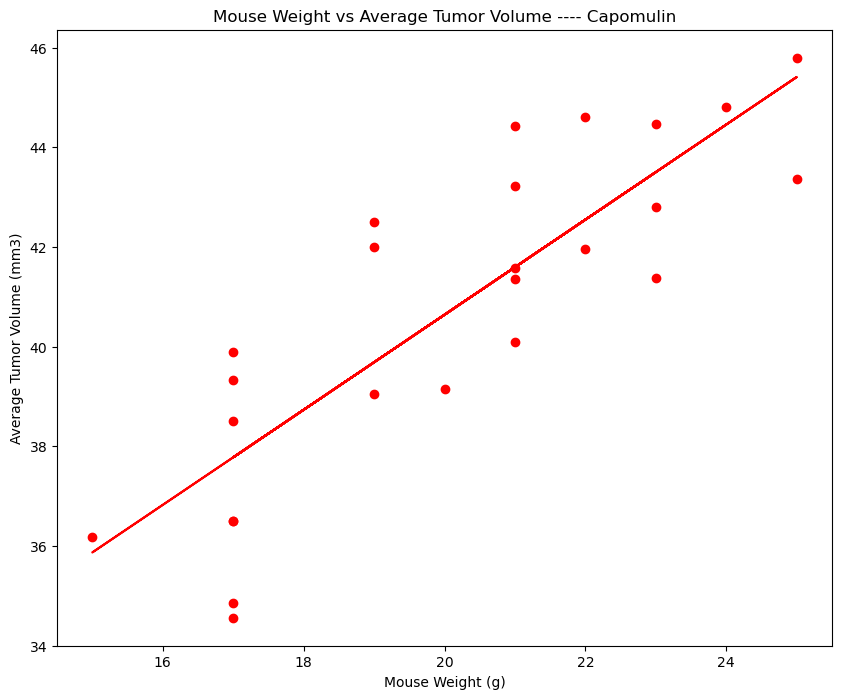

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(vol_weight_merged_df['Mouse Weight'],vol_weight_merged_df['Average Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(vol_weight_merged_df['Mouse Weight'],vol_weight_merged_df['Average Tumor Volume (mm3)'])
regress_values = vol_weight_merged_df['Mouse Weight'] * slope + intercept

plt.figure(figsize=(10,8))
plt.scatter(vol_weight_merged_df['Mouse Weight'],vol_weight_merged_df['Average Tumor Volume (mm3)'], color = 'r')
plt.plot(vol_weight_merged_df['Mouse Weight'],regress_values,'r-')
plt.title('Mouse Weight vs Average Tumor Volume ---- Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('regress_plot')
plt.show()